In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('survey_results_public.csv')
pd.set_option('display.max_columns', None)

In [2]:
df = df[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly']]
df = df.rename({'ConvertedCompYearly':'Salary'}, axis = 1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN


In [3]:
df = df[df['Salary'].notnull()]

In [4]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [5]:
df = df[df['Employment'].str.contains('Employed, full-time')]

In [6]:
df.drop("Employment", axis = 1, inplace = True)

In [7]:
df['Country'].value_counts()

Country
United States of America                                4351
Germany                                                 1657
Ukraine                                                 1333
United Kingdom of Great Britain and Northern Ireland    1239
India                                                    934
                                                        ... 
Lesotho                                                    1
Burundi                                                    1
Barbados                                                   1
Mali                                                       1
Congo, Republic of the...                                  1
Name: count, Length: 160, dtype: int64

In [8]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [9]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Country
Other                                                   5943
United States of America                                4351
Germany                                                 1657
Ukraine                                                 1333
United Kingdom of Great Britain and Northern Ireland    1239
India                                                    934
France                                                   784
Canada                                                   778
Brazil                                                   601
Spain                                                    498
Italy                                                    456
Australia                                                444
Poland                                                   441
Netherlands                                              440
Sweden                                                   403
Name: count, dtype: int64

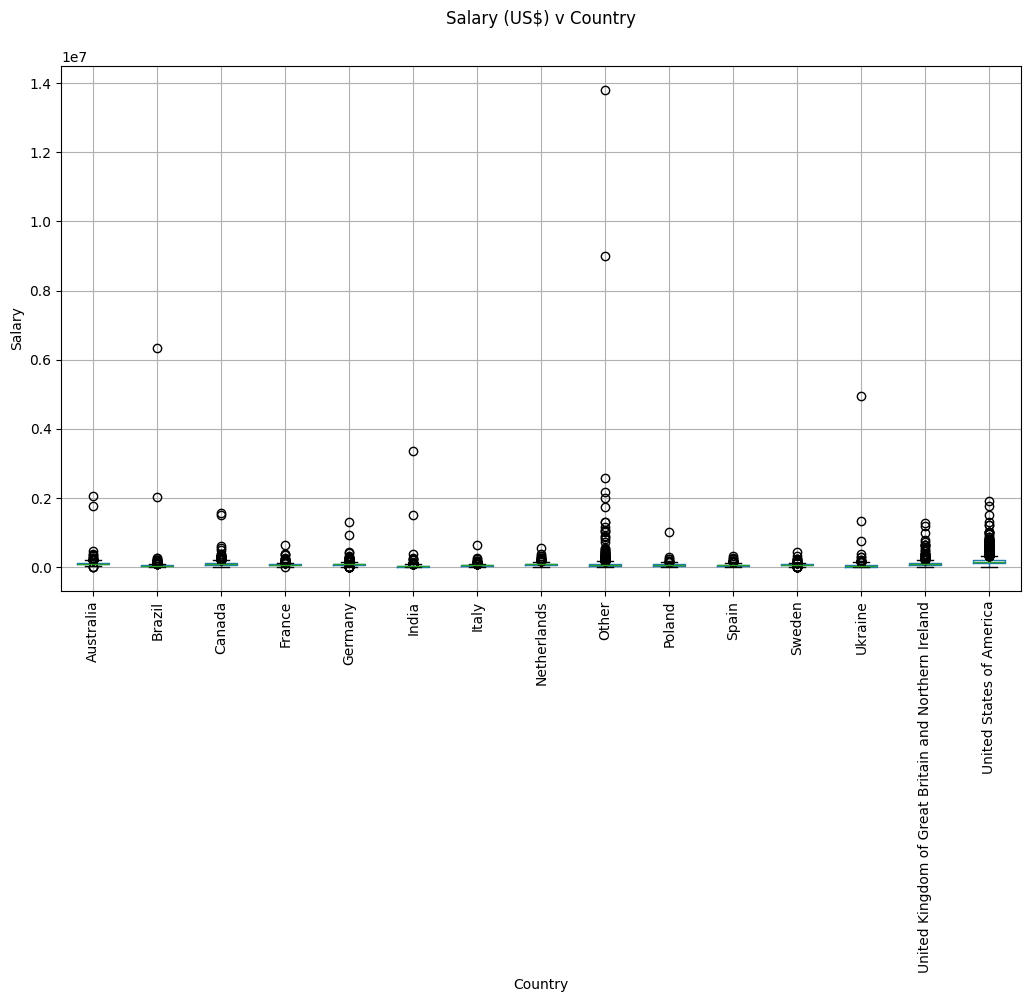

In [10]:
fig, ax = plt.subplots(1,1, figsize =(12,7))
df.boxplot('Salary','Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [11]:
df = df[df['Salary'] <= 200000]
df = df[df['Salary'] >= 10000]
df = df[df['Country'] != 'Other']

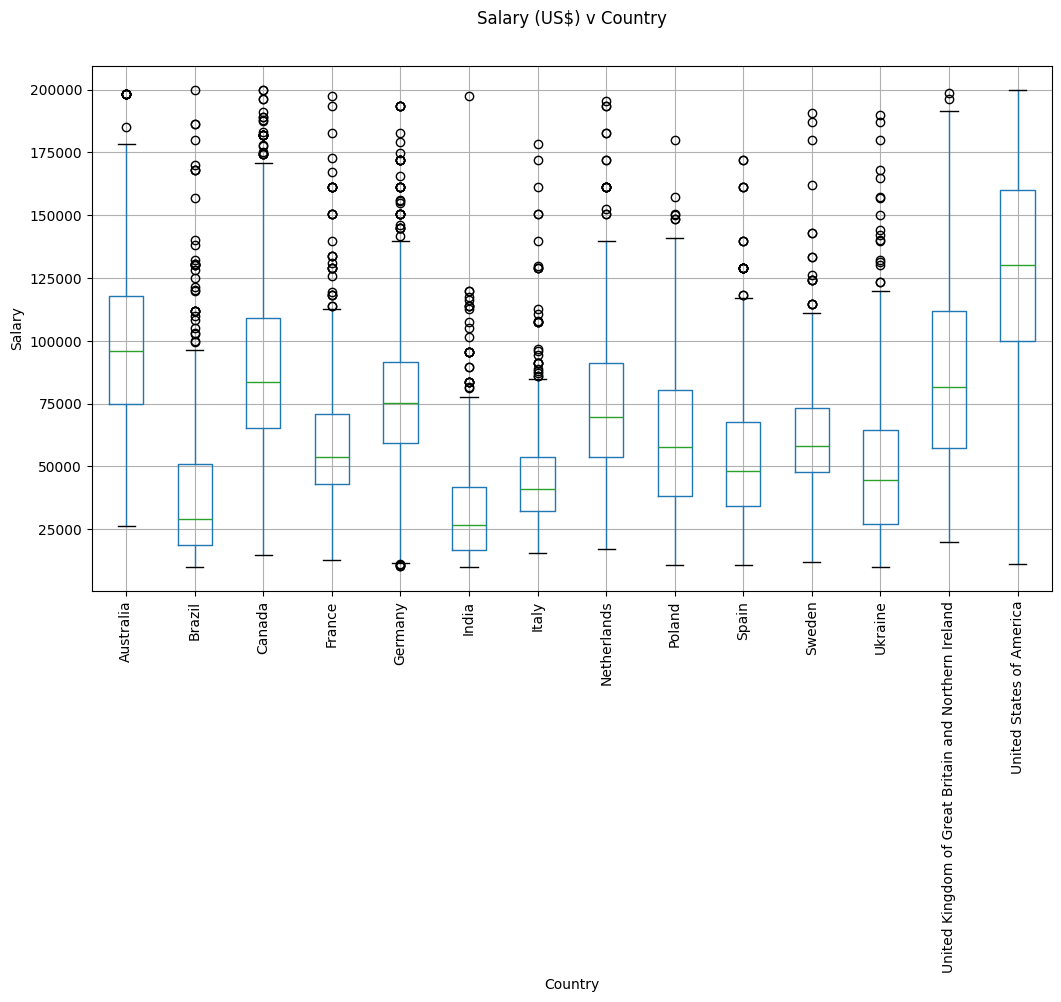

In [12]:
fig, ax = plt.subplots(1,1, figsize = (12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [13]:
df['YearsCodePro'].unique()

array(['7', '18', '25', '30', '50', '27', '17', '1', '15', '4', '23',
       '10', '8', '12', '11', '26', '40', '9', '22', '28', '20', '16',
       '13', '3', '35', '5', '31', '41', '36', '24', '6', '14',
       'Less than 1 year', '2', '38', '32', '21', '19', '34', '29', '33',
       '45', '37', '44', '42', '39', '43', '46', '49', '48', '47'],
      dtype=object)

In [14]:
def clean_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [15]:
df['EdLevel'].unique()

array(['Some college/university study without earning a degree',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [16]:
def clean_education(x):
    if "Bachelor" in x:
        return "Bachelor's degree"
    if "Master" in x:
        return "Master's degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelor's"

In [17]:
df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [18]:
df['EdLevel'].unique()

array(["Less than a Bachelor's", 'Post grad', "Master's degree",
       "Bachelor's degree"], dtype=object)

In [19]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df['EdLevel'].unique()

array([1, 3, 2, 0])

In [20]:
le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13, 12,  3,  1,  4, 11,  2,  6,  5,  9,  7, 10,  8,  0])

In [21]:
X = df.drop('Salary', axis = 1)
y = df['Salary']

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import numpy as np

linear_reg = LinearRegression()
linear_reg.fit(X,y.values)
y_pred = linear_reg.predict(X)

dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(X, y.values)
y_pred2 = dec_tree_reg.predict(X)

rand_for_reg = RandomForestRegressor()
rand_for_reg.fit(X, y.values)
y_pred3 = rand_for_reg.predict(X)

error = np.sqrt(mean_squared_error(y, y_pred))
error2 = np.sqrt(mean_squared_error(y, y_pred2))
error3 = np.sqrt(mean_squared_error(y, y_pred3))

print(error, error2, error3)



39511.833932226815 27118.696448461673 27236.295747862583


In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 2,4,6,8,10,12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

regressor = RandomForestRegressor(random_state=0)
gs = GridSearchCV(regressor, param_grid, scoring = 'neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [164]:
regressor = gs.best_estimator_

regressor.fit(X, y.values)
y_pred4 = regressor.predict(X)
error4 = np.sqrt(mean_squared_error(y, y_pred4))
error4

np.float64(28808.85734383087)

In [165]:
df

,Country,EdLevel,YearsCodePro,Salary
389,13,1,7.0,110000.0
392,12,3,18.0,161044.0
395,12,2,25.0,121018.0
398,13,1,30.0,195000.0
409,3,3,50.0,57999.0
...,...,...,...,...
41167,13,1,25.0,100000.0
41179,11,1,6.0,15600.0
41180,10,2,3.0,44640.0
41184,13,2,30.0,170000.0


In [166]:
X = np.array([['United States of America', "Master's degree", 15]])
X

array([['United States of America', "Master's degree", '15']],
      dtype='<U24')

In [167]:
X[:,0] = le_country.transform(X[:,0])
X[:,1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [170]:
y_pred = dec_tree_reg.predict(X)
y_pred

/data_science/ml_tutorial/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([143841.92307692])

In [169]:
import pickle

In [171]:
data = {'model':regressor, 'le_country': le_country, 'le_education':le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)